# Sentiment Analysis and Text Clustering

## Load Dataset

In [0]:
from google.colab import drive, files
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import sklearn
import re
import seaborn as sns

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
url = "https://drive.google.com/uc?export=download&id=1Xi4Xv6FVAwruTSWrCexrRrBanw8C0mbI"
df = pd.read_csv(url, encoding = "latin1",header=0)

In [0]:
df.shape

(14640, 20)

In [0]:
df['text'] = df.text.str.replace('@VirginAmerica','@Airline 1')
df['text'] = df.text.str.replace('@AmericanAir','@Airline 5')
df['text'] = df.text.str.replace('American Airlines','Airline 5')
df['text'] = df.text.str.replace('#BlackBerry10','')


In [0]:
df[['tweet_id','tweet_created','text']]

,tweet_id,tweet_created,text
0,5.703060e+17,2/24/15 11:35,@Airline 1 What @dhepburn said.
1,5.703010e+17,2/24/15 11:15,@Airline 1 plus you've added commercials to th...
2,5.703010e+17,2/24/15 11:15,@Airline 1 I didn't today... Must mean I need ...
3,5.703010e+17,2/24/15 11:15,@Airline 1 it's really aggressive to blast obn...
4,5.703010e+17,2/24/15 11:14,@Airline 1 and it's a really big bad thing abo...
...,...,...,...
14635,5.695880e+17,2/22/15 12:01,@Airline 5 thank you we got on a different fli...
14636,5.695870e+17,2/22/15 11:59,@Airline 5 leaving over 20 minutes Late Flight...
14637,5.695870e+17,2/22/15 11:59,@Airline 5 Please bring Airline 5 to
14638,5.695870e+17,2/22/15 11:59,"@Airline 5 you have my money, you change my fl..."


In [0]:
df.dtypes

_unit_id                          int64
_golden                            bool
_unit_state                      object
_trusted_judgments                int64
_last_judgment_at                object
airline_sentiment                object
airline_sentiment:confidence    float64
negativereason                   object
negativereason:confidence       float64
airline                          object
airline_sentiment_gold           object
name                             object
negativereason_gold              object
retweet_count                     int64
text                             object
tweet_coord                      object
tweet_created                    object
tweet_id                        float64
tweet_location                   object
user_timezone                    object
dtype: object

In [0]:
colname = ['airline_sentiment', 'airline', 'retweet_count', 'text', 'tweet_created', 'tweet_location', 'user_timezone']
df1 = df[colname]

In [0]:
df1.isnull().sum()

airline_sentiment       0
airline                 0
retweet_count           0
text                    0
tweet_created           0
tweet_location       4733
user_timezone        4820
dtype: int64

In [0]:
text = df.iloc[:,14].values
labels = df.iloc[:,5].values

### Explorarity data analsis

In [0]:
df['tweet_created'] = pd.to_datetime(df['tweet_created'],infer_datetime_format=True)

In [0]:
df['year'],df['month'] = df['tweet_created'].dt.year, df['tweet_created'].dt.month
df['hour'] = df['tweet_created'].dt.hour
df['Weekday'] =df['tweet_created'].dt.weekday #mon=0

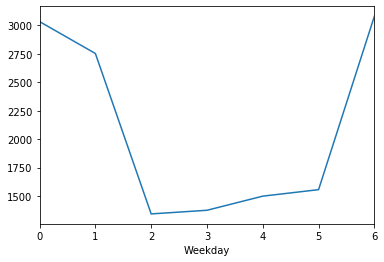

In [0]:
df.groupby('Weekday')['year'].agg('count').plot()

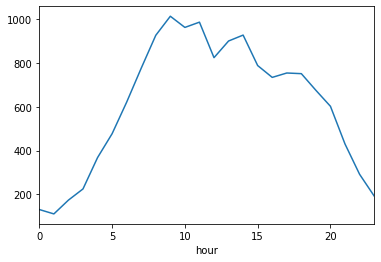

In [0]:
df.groupby('hour')['year'].agg('count').plot()

In [0]:
from sklearn.preprocessing import LabelEncoder   
le = LabelEncoder() 
df ['sen'] = le.fit_transform(df['airline_sentiment'])
df['sen'] = df['sen']-1 

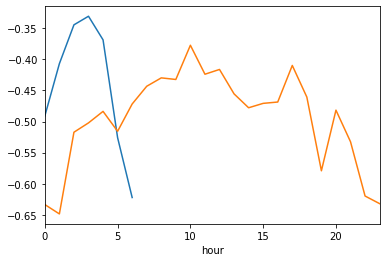

In [0]:
df.groupby('Weekday')['sen'].agg('mean').plot()
df.groupby('hour')['sen'].agg('mean').plot()

In [0]:
#Find the least word length directly from df
#df['Tweet'].map(lambda x: len(x)).max()

In [0]:
df.tweet_created.describe()

count                   14640
unique                   6804
top       2015-02-23 11:50:00
freq                       11
first     2015-02-16 23:36:00
last      2015-02-24 11:53:00
Name: tweet_created, dtype: object

In [0]:
df.tweet_location.unique()

array([nan, 'Lets Play', 'San Francisco CA', ..., 'Columbus, OH, USA',
       'Milwaukee County, Wisconsin', 'Nigeria,lagos'], dtype=object)

## Data Prep

In [0]:
import nltk
import string
from nltk.corpus import stopwords
from textblob import TextBlob
from nltk.tokenize import word_tokenize
import string
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
nltk.download("popular")

[nltk_data] Downloading collection 'popular'
[nltk_data]    | 
[nltk_data]    | Downloading package cmudict to /root/nltk_data...
[nltk_data]    |   Package cmudict is already up-to-date!
[nltk_data]    | Downloading package gazetteers to /root/nltk_data...
[nltk_data]    |   Package gazetteers is already up-to-date!
[nltk_data]    | Downloading package genesis to /root/nltk_data...
[nltk_data]    |   Package genesis is already up-to-date!
[nltk_data]    | Downloading package gutenberg to /root/nltk_data...
[nltk_data]    |   Package gutenberg is already up-to-date!
[nltk_data]    | Downloading package inaugural to /root/nltk_data...
[nltk_data]    |   Package inaugural is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package names to /root/nltk_data...
[nltk_data]    |   Package names is already up-to-date!
[nltk_data]    | Do

True

In [0]:
# clean method 1
processed_features = []

for sentence in range(0, len(text)):
    # Remove all hashtag
    processed_feature = re.sub(r'@(\w)+', ' ', str(text[sentence]))

    # Converting to Lowercase
    processed_feature = processed_feature.lower()

    # Remove all the special characters
    processed_feature = re.sub(r'\W', ' ', processed_feature)

    # remove all single characters
    processed_feature= re.sub(r'\s+[a-zA-Z]\s+', ' ', processed_feature)

    # Remove single characters from the start
    processed_feature = re.sub(r'\^[a-zA-Z]\s+', ' ', processed_feature) 

    # Substituting multiple spaces with single space
    processed_feature = re.sub(r'\s+', ' ', processed_feature, flags=re.I)

    # Removing prefixed 'b'
    processed_feature = re.sub(r'^b\s+', '', processed_feature)

    

    processed_features.append(processed_feature)

In [0]:
text[0]

'@VirginAmerica What @dhepburn said.'

In [0]:
df1 = pd.DataFrame(processed_features, columns=['text'])
df1['num'] = df1.text.apply(lambda x:len(x.split()))
df1.head()

,text,num
0,what said,2
1,plus you ve added commercials to the experien...,9
2,didn today must mean need to take another trip,9
3,it really aggressive to blast obnoxious enter...,16
4,and it a really big bad thing about it,9


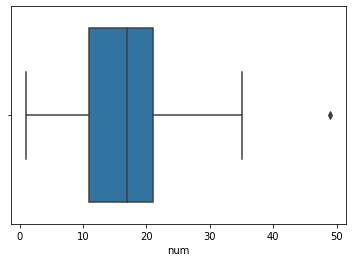

In [0]:
sns.boxplot(df1.num)

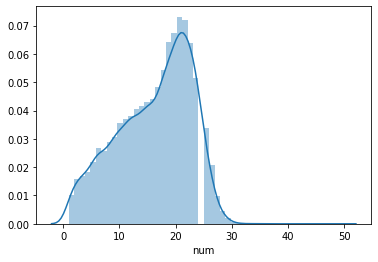

In [0]:
sns.distplot(df1.num)

In [0]:
df1.num.describe()

count    14640.000000
mean        16.189344
std          6.576610
min          1.000000
25%         11.000000
50%         17.000000
75%         21.000000
max         49.000000
Name: num, dtype: float64

## Data Cleaning

In [0]:
rawtext = df.text.rename('rawtext')
df3 = pd.concat([df1,rawtext], axis =1)

#neg = df3[df3.sen==-1]
#pos = df3[df3.sen==1]

def remove_links(tweet):
  '''Takes a string and removes web links from it'''
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # rempve bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return(tweet)

In [0]:
my_stopwords = nltk.corpus.stopwords.words('english')
word_rooter = nltk.stem.snowball.PorterStemmer(ignore_stopwords=False).stem
my_punctuation = '!"$%&\'()*+,-./:;<=>?[\\]^_`{|}~•@ù÷ûï'

# cleaning master function
def clean_tweet(tweet, bigrams=False):
  tweet = remove_links(tweet)
  tweet = tweet.lower() # lower case
  tweet = re.sub('['+my_punctuation + ']+', ' ', tweet) # strip punctuation
  #tweet = re.sub('\s+', ' ', tweet) #remove double spacing
  tweet = re.sub('([0-9]+)', '', tweet) # remove numbers
  tweet_token_list = [word for word in tweet.split(' ') if word not in my_stopwords] # remove stopwords

  tweet_token_list = [word_rooter(word) if '#' not in word else word
                      for word in tweet_token_list] # apply word rooter
  if bigrams:
    tweet_token_list = tweet_token_list+[tweet_token_list[i]+'_'+tweet_token_list[i+1]
  for i in range(len(tweet_token_list)-1)]
  tweet = ' '.join(tweet_token_list)
  return tweet

## Sentiment Analysis

In [0]:
from textblob import TextBlob 
def detect_polarity(text):
    return TextBlob(text).sentiment.polarity
df1['polarity'] = df1.text.apply(detect_polarity)
#positive: >0; neutral: =0; negative <0

In [0]:
df4 = pd.DataFrame(df.text.rename('rawtext'))
df4['cleandata'] = df4.rawtext.apply(clean_tweet)

In [0]:
df4 = pd.concat([df4, df.airline],axis = 1)

In [0]:
#try using df4, which is using new cleaning method
df4['polarity'] = df4.rawtext.apply(detect_polarity)

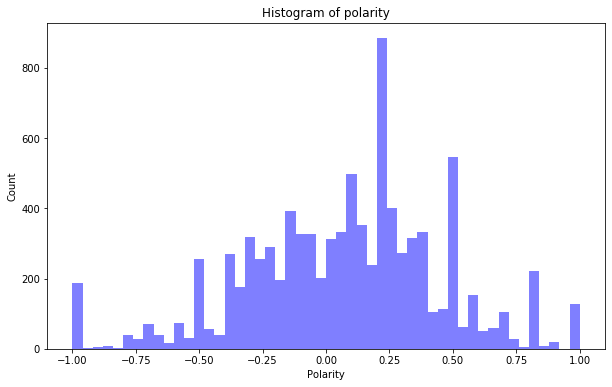

In [0]:
num_bins = 50
plt.figure(figsize=(10,6))
n, bins, patches = plt.hist(df1[df4.polarity!=0].polarity, num_bins, facecolor='blue', alpha=0.5)
plt.xlabel('Polarity')
plt.ylabel('Count')
plt.title('Histogram of polarity')
plt.show();

In [0]:
def get_sentiment(polarity):
  if polarity > 0:
    return(1)
  elif polarity ==0:
    return(0)
  else:
    return(-1)
#df4['sen'] = df1.polarity.apply(lambda x:get_sentiment(x))
df3['sen'] = df1.polarity.apply(lambda x:get_sentiment(x))

In [0]:
df4.sen.value_counts()

 0    5540
 1    5457
-1    3643
Name: sen, dtype: int64

In [0]:
air = df.airline

In [0]:
df2 = pd.concat([df1,air],axis=1)

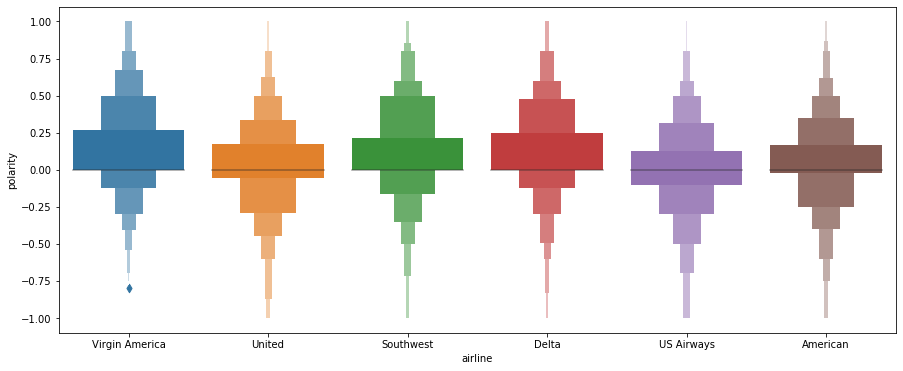

In [0]:
import seaborn as sns
plt.figure(figsize=(15,6))
sns.boxenplot(x='airline', y='polarity', data=df2)
plt.show();

In [0]:
#df2.to_csv(df2.csv)

### find mentioned

In [0]:
def find_mentioned(tweet):
  '''This function will extract the twitter handles of people mentioned in the tweet'''
  return re.findall('(?<!RT\s)(@[A-Za-z]+[A-Za-z0-9-_]+)', tweet)

In [0]:
# Flattern the list into one column df
#a = pd.Series(np.concatenate(df.mentioned))

In [0]:
#a.value_counts().sort_index().rename_axis('x').reset_index(name='f')

### Compare to the original dataset sentiment analysis

In [0]:
sent = df.airline_sentiment.replace({'positive':1,
                              'neutral':0,
                              'negative':-1})

In [0]:
#sent = df.airline_sentiment
df3 = pd.concat([df1,sent],axis=1)

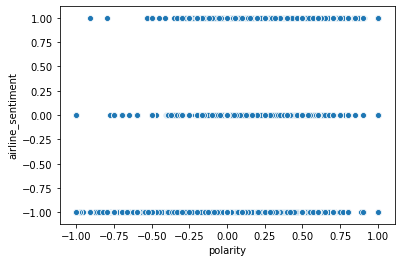

In [0]:
sns.scatterplot(x='polarity', y='airline_sentiment', data= df3)

In [0]:
df3.head()

,text,num,polarity,airline_sentiment
0,what said,2,0.00000,0
1,plus you ve added commercials to the experien...,9,0.00000,1
2,didn today must mean need to take another trip,9,-0.31250,0
3,it really aggressive to blast obnoxious enter...,16,0.00625,-1
4,and it a really big bad thing about it,9,-0.35000,-1


## TFIDF

In [0]:
#max_features=500: 500 most frequently occurring words to create a bag of words 
#TfidfVectorizer: class that can be used to convert text features into TF-IDF feature vectors.
#not sure if this should be applied cause it will devide by the overall text 
vectorizer = TfidfVectorizer (max_features=21, min_df=3)
processed_features_0 = vectorizer.fit_transform(processed_features).toarray()

In [0]:
df2 = pd.DataFrame(processed_features_0)
df2.head()

In [0]:
len(np.where(~processed_features_0.any(axis=1))[0])

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

## Train RandomForest Models 75%

In [0]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

In [0]:
predictions = text_classifier.predict(X_test)

In [0]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

In [0]:
#Logistic Model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

for c in [0.01, 0.05, 0.25, 0.5, 1]:
    
    lr = LogisticRegression(C=c)
    lr.fit(X_train, y_train)
    print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, lr.predict(X_test))))

In [0]:
#XGBoosting
from xgboost import XGBClassifier

clf = XGBClassifier()
clf.fit(X_train, y_train)

In [0]:
# make predictions for test data
y_pred = clf.predict(X_test)
#predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

In [0]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

## Text Clustering

### neg topics

In [0]:
neg = df3[df3.sen==-1]
pos = df3[df3.sen==1]

In [0]:
neg.head()

,text,num,polarity,rawtext,sen,clean_tweet
2,didn today must mean need to take another trip,9,-0.312500,@VirginAmerica I didn't today... Must mean I n...,-1,virginamerica today must mean need take anot...
4,and it a really big bad thing about it,9,-0.350000,@VirginAmerica and it's a really big bad thing...,-1,virginamerica realli big bad thing
5,seriously would pay 30 flight for seats that ...,21,-0.208333,@VirginAmerica seriously would pay $30 a fligh...,-1,virginamerica serious would pay flight seat...
26,what happened 2 ur vegan food options at leas...,26,-0.075000,@VirginAmerica What happened 2 ur vegan food o...,-1,virginamerica happen ur vegan food option l...
32,help left expensive headphones on flight 89 i...,20,-0.250000,"@VirginAmerica help, left expensive headphones...",-1,virginamerica help left expens headphon flig...


In [0]:
def display_topics(model, feature_names, no_top_words):
  topic_dict = {}
  for topic_idx, topic in enumerate(model.components_):
    topic_dict["Topic %d words" % (topic_idx)]= ['{}'.format(feature_names[i])
    for i in topic.argsort()[:-no_top_words - 1:-1]]
    topic_dict["Topic %d weights" % (topic_idx)]= ['{:.1f}'.format(topic[i])
    for i in topic.argsort()[:-no_top_words - 1:-1]]
  return pd.DataFrame(topic_dict)

In [0]:
neg['clean_tweet'] = neg.rawtext.apply(clean_tweet)
from sklearn.feature_extraction.text import CountVectorizer

# the vectorizer object will be used to transform text to vector form
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
# apply transformation
tf = vectorizer.fit_transform(neg['clean_tweet']).toarray()

# tf_feature_names tells us what word each column in the matric represents
tf_feature_names = vectorizer.get_feature_names()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [0]:
from sklearn.decomposition import LatentDirichletAllocation

number_of_topics = 5

model = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model.fit(tf)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
no_top_words = 10
display_topics(model, tf_feature_names, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,usairway,492.9,flight,1193.2,unit,274.5,servic,420.2,unit,636.9
1,call,217.1,cancel,311.2,flight,261.8,custom,367.2,airlin,211.4
2,hold,179.0,usairway,260.2,jetblu,185.2,americanair,314.5,worst,162.8
3,americanair,155.7,delay,232.3,southwestair,177.3,unit,167.2,bag,149.4
4,tri,151.1,americanair,176.2,still,176.0,usairway,164.1,fli,145.2
5,hour,142.0,hour,165.4,late,169.9,rude,108.0,check,96.7
6,wait,135.5,late,149.5,hour,150.1,ticket,102.6,ever,93.1
7,get,123.6,flightl,147.2,seat,112.5,terribl,99.0,americanair,92.4
8,time,108.5,due,143.4,delay,110.1,southwestair,76.5,never,90.9
9,help,106.8,plane,127.5,flightr,108.0,get,69.1,time,78.8


In [0]:
neg[neg.clean_tweet.str.contains('flight cancel|delay')]

,text,num,polarity,rawtext,sen,clean_tweet
122,like the customer service but 40 min delay ju...,16,-0.050000,@VirginAmerica I like the customer service but...,-1,virginamerica like custom servic min delay c...
198,you stink flight cancelled flighted from psp ...,19,-0.116667,@VirginAmerica you stink. Flight Cancelled Fli...,-1,virginamerica stink flight cancel flight psp...
218,why cancelled flight flight vx413 one sec its...,25,-0.050000,@VirginAmerica why Cancelled Flight flight VX4...,-1,virginamerica cancel flight flight vx one se...
299,weather delays gt next few weeks jfk bos dca,9,-0.100000,@VirginAmerica weather delays &gt; next few we...,-1,virginamerica weather delay gt next week ...
495,my flight 6000 scheduled for 1pm departure st...,23,-0.050000,@VirginAmerica my flight (6000) scheduled for ...,-1,virginamerica flight schedul pm departur s...
...,...,...,...,...,...,...
14361,no one answers phone delayed cancelled flight...,21,-0.375000,"@AmericanAir \nNo one answers phone, delayed/C...",-1,americanair \nno one answer phone delay canc...
14401,worst airline ever we have been stranded for ...,21,-0.500000,@AmericanAir Worst airline ever. We have been ...,-1,americanair worst airlin ever strand hour ...
14485,flight cancelled flighted out of lax for tomo...,23,-0.125000,@AmericanAir flight Cancelled Flighted out of ...,-1,americanair flight cancel flight lax tomorrow...
14535,flight cancelled flighted and rebooked but ag...,22,-0.500000,@AmericanAir Flight Cancelled Flighted and reb...,-1,americanair flight cancel flight rebook agent...


In [0]:
neg.loc[14597].text

' do you dislike delays when they re caused by your crew forgetting to load bags amp lazy pilot wanting duty day to end '

### positive topics

In [0]:
pos['clean_tweet'] = pos.rawtext.apply(clean_tweet)
vectorizer = CountVectorizer(max_df=0.9, min_df=25, token_pattern='\w+|\$[\d\.]+|\S+')
tf_p = vectorizer.fit_transform(pos['clean_tweet']).toarray()
tf_feature_names_p = vectorizer.get_feature_names()
number_of_topics = 5
model_p = LatentDirichletAllocation(n_components=number_of_topics, random_state=0)
model_p.fit(tf_p)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=5, n_jobs=None,
                          perp_tol=0.1, random_state=0, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [0]:
no_top_words = 10
display_topics(model_p, tf_feature_names_p, no_top_words)

,Topic 0 words,Topic 0 weights,Topic 1 words,Topic 1 weights,Topic 2 words,Topic 2 weights,Topic 3 words,Topic 3 weights,Topic 4 words,Topic 4 weights
0,unit,602.7,unit,556.0,flight,1074.2,southwestair,901.1,jetblu,721.3
1,flight,333.6,usairway,170.5,usairway,332.0,thank,282.5,thank,706.1
2,plane,256.1,thank,168.4,americanair,319.3,fli,260.1,americanair,388.3
3,time,253.7,pleas,157.0,cancel,277.2,servic,253.1,unit,270.4
4,usairway,223.2,right,142.5,delay,242.6,virginamerica,226.2,,235.9
5,seat,211.2,americanair,135.5,hour,226.1,custom,216.5,usairway,206.9
6,first,210.2,,132.2,get,185.3,love,192.8,great,192.6
7,americanair,198.5,jetblu,90.6,flightl,132.2,jetblu,156.9,help,152.2
8,gate,164.3,want,88.4,hold,113.0,guy,152.8,would,133.2
9,get,147.7,email,83.9,southwestair,110.3,flight,148.4,much,115.0
